In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importation des données

In [30]:

df = pd.read_csv('/Users/tonin/Downloads/Hors_ICLOUD/MOSEF venv/SCORING/Projet_scoring/data/hmeq.csv')

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Analyse des variables 

In [33]:
print(df.shape)

df.describe().T

(5960, 13)


,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


Analyses des var catégorielles

In [38]:
cols_cat= df.select_dtypes(['object'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize= False))
    print('*'*40)

Unique values in REASON are :
REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64
****************************************
Unique values in JOB are :
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64
****************************************


/var/folders/lz/b2012nqs7tqg81n0ln_ncbxw0000gn/T/ipykernel_62906/793389353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=axes[i])
/var/folders/lz/b2012nqs7tqg81n0ln_ncbxw0000gn/T/ipykernel_62906/793389353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=axes[i])


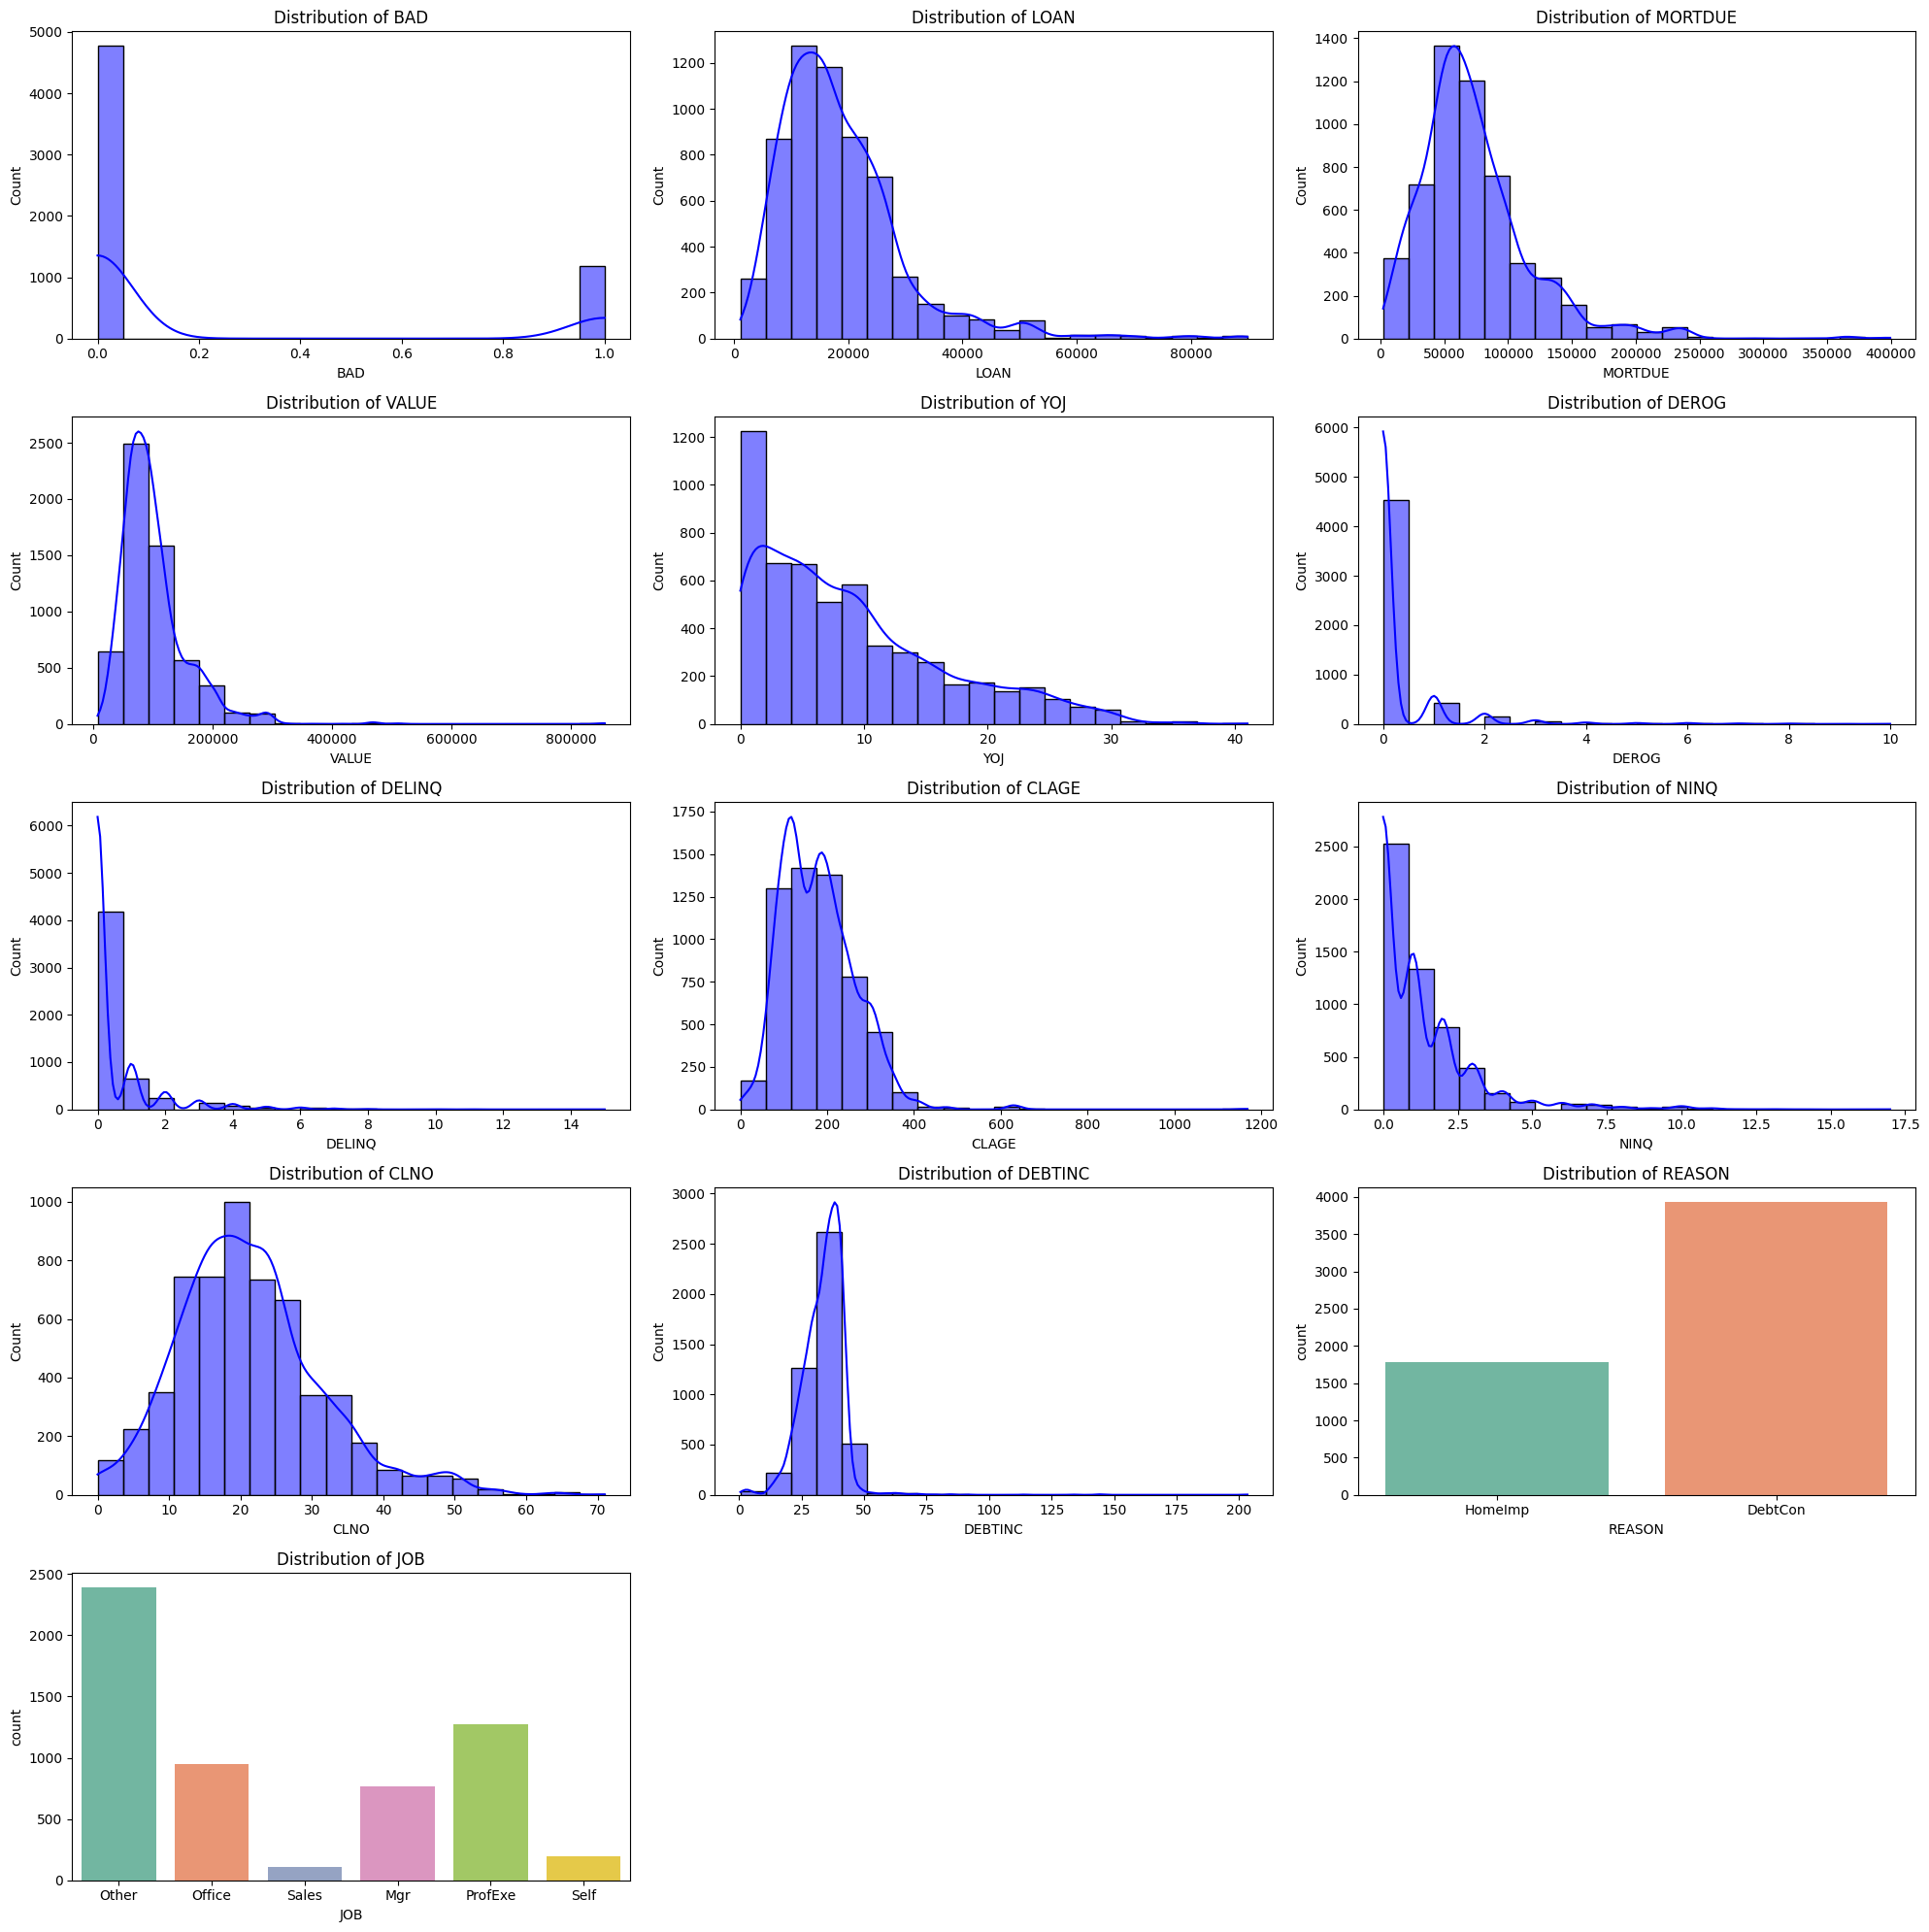

In [17]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.flatten() 

i = 0

# Tracer les distributions des variables numériques
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    i += 1

# Tracer les distributions des variables catégorielles
for col in cat_cols:
    sns.countplot(x=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    i += 1

# Supprimer les sous-graphiques vides s'il y en a
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

Corrélation 

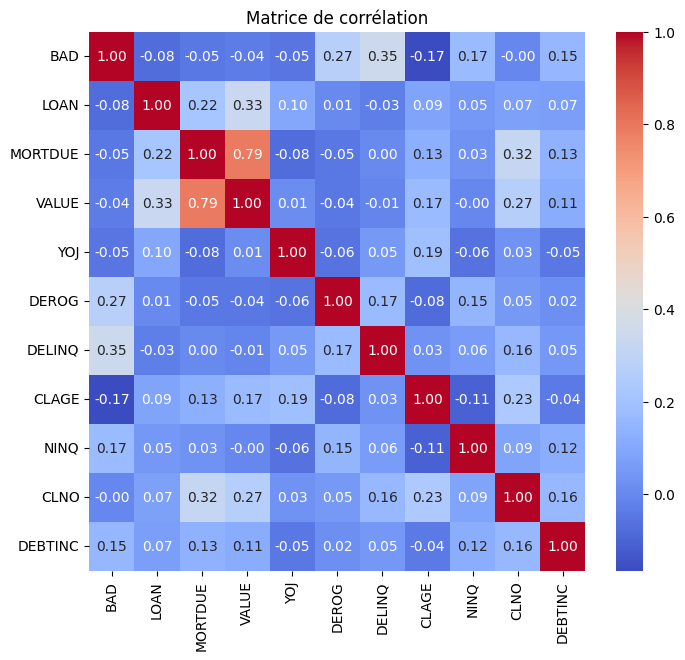

Variables les plus corrélées à BAD :
 DELINQ     0.346503
DEROG      0.269921
NINQ       0.170031
DEBTINC    0.154544
CLNO      -0.004543
VALUE     -0.036492
MORTDUE   -0.046186
YOJ       -0.053956
LOAN      -0.075099
CLAGE     -0.165614
Name: BAD, dtype: float64
Variables corrélées à + de 0.15 avec BAD :
 Index(['DELINQ', 'DEROG', 'NINQ', 'DEBTINC', 'CLAGE'], dtype='object')


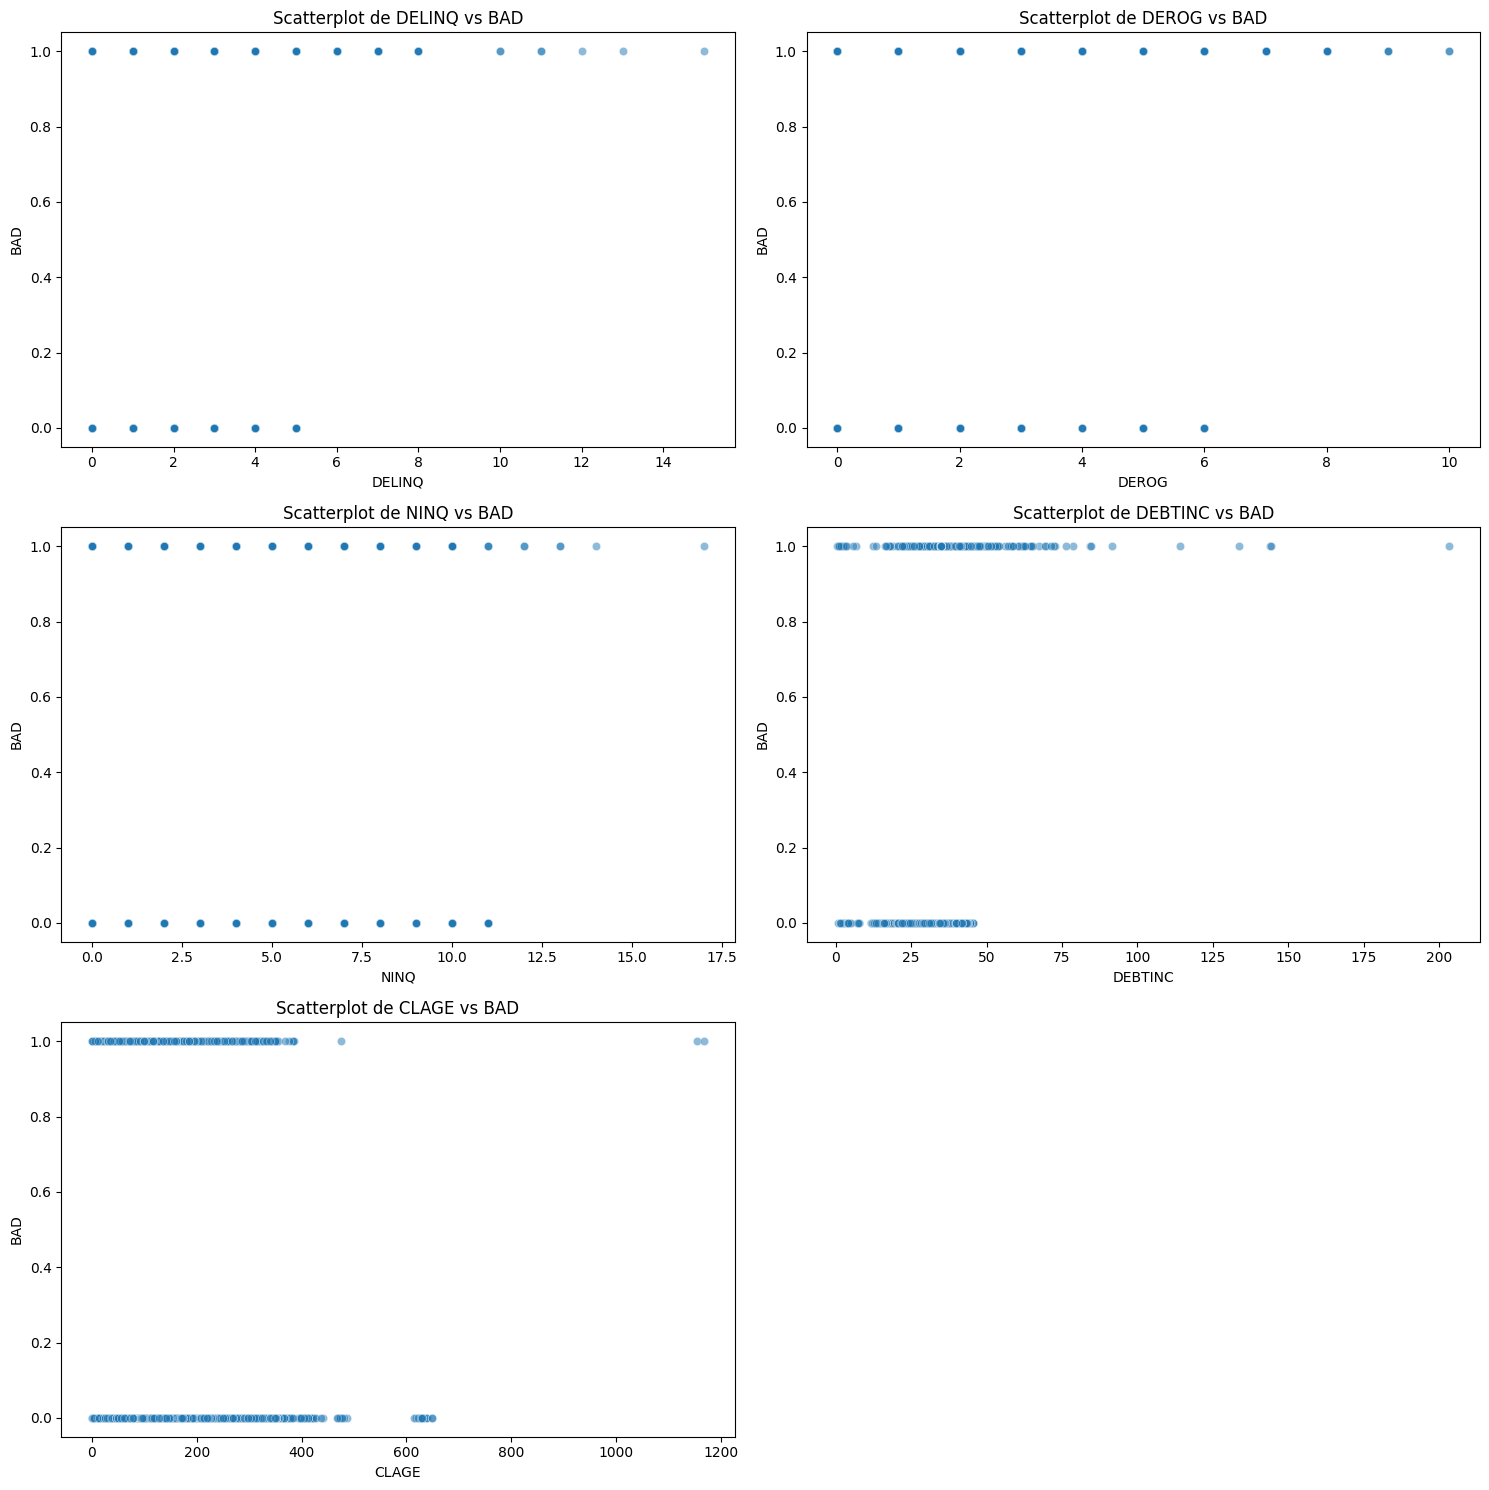

In [46]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_cols.corr()

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


corr_bad = correlation_matrix['BAD'].drop('BAD').sort_values(ascending=False)
print("Variables les plus corrélées à BAD :\n", corr_bad)

top_correlated = corr_bad[abs(corr_bad) > 0.15].index[:5]
print("Variables corrélées à + de 0.15 avec BAD :\n", top_correlated)




fig, axes = plt.subplots(3, 2, figsize=(15, 15))  
axes = axes.flatten()

for i, var in enumerate(top_correlated):
    sns.scatterplot(x=var, y='BAD', data=df, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Scatterplot de {var} vs BAD')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('BAD')

# Supprimer les axes inutilisés si moins de 6 variables
for j in range(len(top_correlated), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Prétraitement des Données

GERER LES VALEURS MANQUANTES

1. Imputation par la médiane/le mode


In [39]:

print(df.isnull().sum())

# Imputation des valeurs manquantes par la médiane pour les variables numériques
# + par le mode pour les variables catégorielles

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Valeurs manquantes après imputation :
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


2. IMPUTATION PAR REGRESSION

In [40]:
for col in num_cols:
    if df[col].isnull().sum() > 0:
        print(f"\nImputation des valeurs manquantes pour : {col}")
        
        df_complete = df[df[col].notna()]
        df_missing = df[df[col].isna()]

        X_train = df_complete.drop(columns=[col])  
        y_train = df_complete[col]  
        
        X_train = pd.get_dummies(X_train, drop_first=True) 

        X_train = X_train.dropna(axis=1)
        
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
    
        X_missing = df_missing.drop(columns=[col])
        X_missing = pd.get_dummies(X_missing, drop_first=True)
        
        X_missing = X_missing[X_train.columns]
        
        df.loc[df[col].isna(), col] = regressor.predict(X_missing)

print("\nVérification des valeurs manquantes après imputation :")
print(df.isnull().sum())



Vérification des valeurs manquantes après imputation :
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


OUTLIERS

In [29]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        print(f"{col} - Nombre d'outliers : {len(outliers[col])}")
    return outliers

# Appliquer la détection d'outliers pour les variables numériques
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers = detect_outliers_iqr(df, num_cols)


BAD - Nombre d'outliers : 1189
LOAN - Nombre d'outliers : 256
MORTDUE - Nombre d'outliers : 234
VALUE - Nombre d'outliers : 320
YOJ - Nombre d'outliers : 91
DEROG - Nombre d'outliers : 725
DELINQ - Nombre d'outliers : 1201
CLAGE - Nombre d'outliers : 47
NINQ - Nombre d'outliers : 177
CLNO - Nombre d'outliers : 219
DEBTINC - Nombre d'outliers : 94
